In [1]:
# imports
import os
import math
import matplotlib.pyplot as plt
from statistics import mode

Each seismometer reports its x and y position and the time (measured from some arbitrary t0) the earthquake was detected. We will assume that the p-waves move at exactly 6 km/s.

In [2]:
# get some test data
x0 = 8.382353226
y0 = -58.003720814
t0 = 12.860754193
x1 = -13.590571819
y1 = 73.976069096
t1 = 22.847488548
x2 = 77.291172370
y2 = 7.508764456
t2 = 5.767809783
v = 6

Methods derived from Paul Bourke's excellent [website](http://paulbourke.net/geometry/circlesphere/).

In [3]:
# write a function to find the epicenter
def find_earthquake_center(x0, y0, t0, x1, y1, t1, x2, y2, t2, v):
    
    # convert velocities and times to distance
    r0 = v*t0
    r1 = v*t1
    r2 = v*t2
    
    # get the distance between the circles
    d_01 = math.sqrt((x1-x0)**2 + (y1-y0)**2)
    d_12 = math.sqrt((x2-x1)**2 + (y2-y1)**2)
    
    # handle any non-intersecting cases
    if d_01 > r0+r1 or d_12 > r1+r2:
        print("Not all cicles intersect (None)")
        return None
    if d_01 < abs(r0-r1) or d_12 < abs(r1-r2):
        print("Not all cicles intersect (Contained)")
        return None
    if (d_01 == 0 and r0 == r1) or (d_12 == 1 and r1 == r2):
        print("Not all cicles intersect (Coincident)")
        return None
    
    # if the first circles do intersect
    else:
        
        # calculate the first and second legs for the first circle pair
        a0 = (r0**2-r1**2+d_01**2)/(2*d_01)
        h0 = math.sqrt(r0**2-a0**2)
        
        # find the midpoint for the first circle pair
        mid_x0 = x0+a0*(x1-x0)/d_01   
        mid_y0 = y0+a0*(y1-y0)/d_01 
               
        # return the first set of intersections
        int_x0 = mid_x0+h0*(y1-y0)/d_01     
        int_y0 = mid_y0-h0*(x1-x0)/d_01 
        int_x1 = mid_x0-h0*(y1-y0)/d_01
        int_y1 = mid_y0+h0*(x1-x0)/d_01
                
        # calculate the first and second legs for the second circle pair
        a1 = (r1**2-r2**2+d_12**2)/(2*d_12)
        h1 = math.sqrt(r1**2-a1**2)
        
        # find the midpoint for the second circle pair
        mid_x1 = x1+a1*(x2-x1)/d_12   
        mid_y1 = y1+a1*(y2-y1)/d_12 
        
        # return the second set of intersections
        int_x2 = mid_x1+h1*(y2-y1)/d_12     
        int_y2 = mid_y1-h1*(x2-x1)/d_12 
        int_x3 = mid_x1-h1*(y2-y1)/d_12
        int_y3 = mid_y1+h1*(x2-x1)/d_12
        
        # list the intersecting coordinates
        int_x_coords = [int_x0, int_x1, int_x2, int_x3]
        int_y_coords = [int_y0, int_y1, int_y2, int_y3]
        
        # get the epicenter
        epicenter = [mode(int_x_coords), mode(int_y_coords)]
    
    # plot the circles
    circle_0_plot = plt.Circle((x0, y0), r0, color='r', fill=False)
    circle_1_plot = plt.Circle((x1, y1), r1, color='g', fill=False)
    circle_2_plot = plt.Circle((x2, y2), r2, color='b', fill=False)

    # get some rought plot limits
    x_coords =  [x0-r0, x0+r0, x1-r1, x1+r1, x2-r2, x2+r2]
    y_coords = [y0-r0, y0+r0, y1-r1, y1+r1, y2-r2, y2+r2]
    x_min = 1.1*min(x_coords)
    x_max = 1.1*max(x_coords)
    y_min = 1.1*min(y_coords)
    y_max = 1.1*max(y_coords)
    
    # set up the plot
    fig, ax = plt.subplots(tight_layout="")
    ax.axis('off')
    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    
    # add the circles
    ax.add_artist(circle_0_plot)
    ax.add_artist(circle_1_plot)
    ax.add_artist(circle_2_plot)
    
    # plot the centroids
    plt.plot([x0], [y0], '.', color='r', label='Seismometer #0')
    plt.plot([x1], [y1], '.', color='g', label='Seismometer #1')
    plt.plot([x2], [y2], '.', color='b', label='Seismometer #2')
    
    # plot all of the intersections, and the epicenter
    plt.plot([int_x0], [int_y0], '.', color='k', label='Intersection')
    plt.plot([int_x1], [int_y1], '.', color='k')
    plt.plot([int_x2], [int_y2], '.', color='k')
    plt.plot([int_x3], [int_y3], '.', color='k')
    plt.plot(epicenter[0], epicenter[1], 'o', color='k', label='Epicenter')
    
    # make sure it's square-ish for the circles
    plt.gca().set_aspect('equal', adjustable='box')
    
    # show the legend
    plt.legend(bbox_to_anchor=[1.3, .85], loc='center')
    
    # save figure
    plt.savefig(os.path.dirname("Epicenter_locator.ipynb") + "epicenter_example.png", dpi=300)

Let's apply the test and visualize the results.

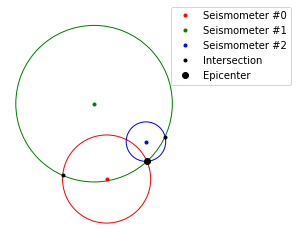

In [4]:
find_earthquake_center(x0, y0, t0, x1, y1, t1, x2, y2, t2, v)